In [63]:
import numpy as np
import sys
import json

#import simtools as sim

import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] = 4

def fname(d):
    return "BSDS_16_16_42_8_4_2_"+str(d) + "_" + str(d) + "False_coen_cagli_False_True"

def fqname(d):
    return "BSDS_16_16_42_8_4_2_"+str(d) + "_" + str(d) + "False_coen_cagli_False_True"

def ffname(d):
    return "BSDS_{}_{}_{}_8_4_2_{}_{}False_coen_cagli_False_True".format(d[0],d[0],d[1],int(1.5*d[0]),int(1.5*d[0]))

ffname([12,60])

'BSDS_12_12_60_8_4_2_18_18False_coen_cagli_False_True'

In [64]:
att_ST_n = []
no_att_ST_n = []
ST_n = []
ST_c = []

RR = [20,24,28,32]

for d in RR:
    att_ST_n.append(np.loadtxt("./inference/visualGSM/"+fname(d)+"/att_size_tuning_noisy.csv"))
    no_att_ST_n.append(np.loadtxt("./inference/visualGSM/"+fname(d)+"/no_att_size_tuning_noisy.csv"))
    ST_n.append(np.loadtxt("./inference/visualGSM/"+fname(d)+"/size_tuning_noisy.csv"))
    ST_c.append(np.loadtxt("./inference/visualGSM/"+fname(d)+"/size_tuning_clean.csv"))

/home/gbarello/tf17/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


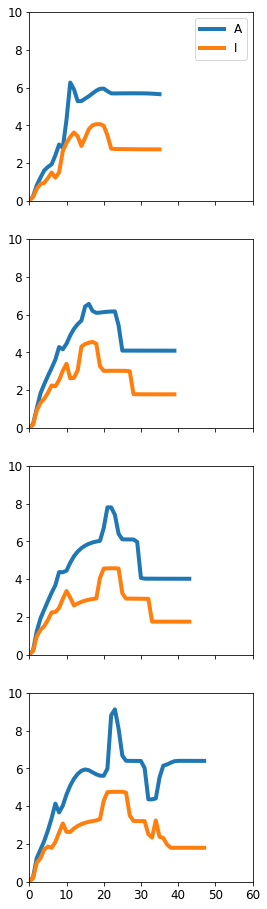

[6.2697791846280433,
 6.5626544819036514,
 7.8035415838815512,
 9.1203313899766236]

In [65]:

nrows, ncols = len(att_ST_n) , 1
dx, dy = 1, 1
figsize = plt.figaspect(float(dy * nrows) / float(dx * ncols))

fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize = figsize)
fig.subplots_adjust(hspace=.2, wspace=1)

for k in range(0,len(att_ST_n)):
    ax[k].plot(att_ST_n[k][:,0],label = "A")
    ax[k].plot(no_att_ST_n[k][:,0],label = "I")
    ax[k].set(ylim=[0, 10],xlim = [0,60])
    if k == 0:
        ax[k].legend()
plt.ylim([0,10])
plt.show()
plt.savefig("./size_TC_cen_sur_range.pdf")

SIatt = [1 - (att_ST_n[k][-1,0]/np.max(att_ST_n[k][:,0])) for k in range(len(att_ST_n))]
SInatt = [1 - (no_att_ST_n[k][-1,0]/np.max(no_att_ST_n[k][:,0])) for k in range(len(att_ST_n))]
SIn = [1 - (ST_n[k][-1,0]/np.max(ST_n[k][:,0])) for k in range(len(att_ST_n))]
SIc = [1 - (ST_c[k][-1,0]/np.max(ST_c[k][:,0])) for k in range(len(att_ST_n))]

max_SIatt = [np.max(att_ST_n[k]) for k in range(len(att_ST_n))]
max_SInatt = [np.max(no_att_ST_n[k]) for k in range(len(att_ST_n))]
max_SIatt

/home/gbarello/tf17/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


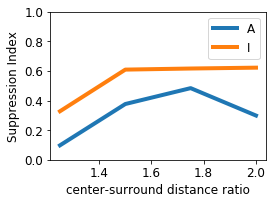

<Figure size 432x288 with 0 Axes>

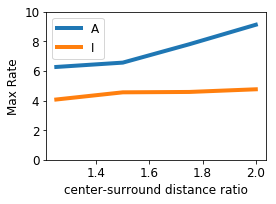

<Figure size 432x288 with 0 Axes>

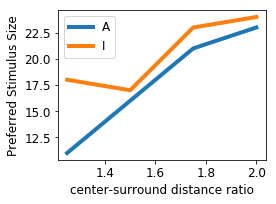

In [68]:
r = np.array(RR)/16.

plt.figure(figsize = (4,3))
plt.plot(r,SIatt,label = "A")
plt.plot(r,SInatt,label = "I")
#plt.plot(r,SIn,label = "n")
#plt.plot(r,SIc,label = "c")
plt.legend()
plt.xlabel("center-surround distance ratio")
plt.ylabel("Suppression Index")
plt.ylim(0,1)
plt.tight_layout()

plt.savefig("./att_SI_by_cen_sur_dist.pdf",figsize=(2,1.5), dpi=72)

plt.show()


plt.clf()

plt.figure(figsize = (4,3))
plt.plot(r,max_SIatt,label = "A")
plt.plot(r,max_SInatt,label = "I")
plt.legend()
plt.ylim([0,10])
plt.xlabel("center-surround distance ratio")
plt.ylabel("Max Rate")
plt.tight_layout()

plt.savefig("./att_max_rate_by_cen_sur_dist.pdf",figsize=(2,1.5), dpi=72)

plt.show()

plt.clf()

plt.figure(figsize = (4,3))
plt.plot(r,[np.argmax(att_ST_n[k][:,0]) for k in range(len(r))],label = "A")
plt.plot(r,[np.argmax(no_att_ST_n[k][:,0]) for k in range(len(r))],label = "I")
plt.legend()
plt.xlabel("center-surround distance ratio")
plt.ylabel("Preferred Stimulus Size")
plt.tight_layout()

plt.savefig("./att_pref_size_by_cen_sur_dist.pdf",figsize=(2,1.5), dpi=72)

plt.show()

In [67]:
np.argmax(att_ST_n[k][:,0])

23

In [47]:
att_ST_n = []
no_att_ST_n = []
ST_n = []
ST_c = []

RR = [[12,42],[16,42],[20,60]]

for d in RR:
    att_ST_n.append(np.loadtxt("./inference/visualGSM/"+ffname(d)+"/att_size_tuning_noisy.csv"))
    no_att_ST_n.append(np.loadtxt("./inference/visualGSM/"+ffname(d)+"/no_att_size_tuning_noisy.csv"))
    ST_n.append(np.loadtxt("./inference/visualGSM/"+ffname(d)+"/size_tuning_noisy.csv"))
    ST_c.append(np.loadtxt("./inference/visualGSM/"+ffname(d)+"/size_tuning_clean.csv"))

/home/gbarello/tf17/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


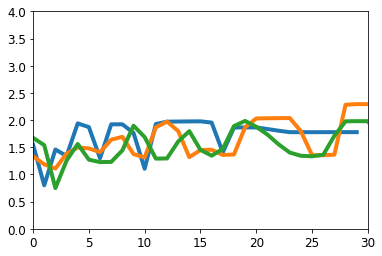

In [48]:
for k in range(len(att_ST_n)):
    plt.plot(att_ST_n[k][:,0]/no_att_ST_n[k][:,0])
plt.xlim([0,30])
plt.ylim([0,4])
plt.show()

In [49]:
att_ST_n = []
no_att_ST_n = []
ST_n = []
ST_c = []

RR = ["_0.5","_0.75",""]

for d in RR:
    att_ST_n.append(np.loadtxt("./inference/visualGSM/"+fname(24)+"/att_size_tuning{}_noisy.csv".format(d)))
    no_att_ST_n.append(np.loadtxt("./inference/visualGSM/"+fname(24)+"/no_att_size_tuning{}_noisy.csv".format(d)))

In [50]:
for k in range(len(RR)):
    plt.plot(att_ST_n[k][:,0]/no_att_ST_n[k][:,0],label = str(k))
plt.legend()
plt.show()

for k in range(len(RR)):
    plt.plot(att_ST_n[k][:,0],no_att_ST_n[k][:,0],label = str(k))
plt.legend()
plt.show()

/home/gbarello/tf17/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 432x288 with 0 Axes>

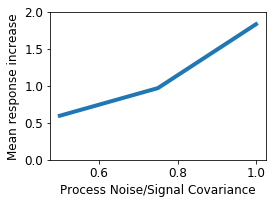

<Figure size 432x288 with 0 Axes>

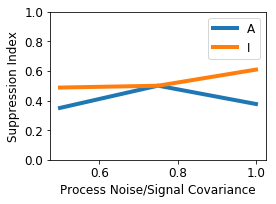

In [61]:
plt.clf()
plt.figure(figsize = (4,3))

plt.plot([.5,.75,1],[np.mean(att_ST_n[k][:,0]-no_att_ST_n[k][:,0]) for k in range(3)])
plt.xlabel("Process Noise/Signal Covariance")
plt.ylabel("Mean response increase")
#plt.xlim(0,1)
plt.ylim(0,2)
plt.tight_layout()
plt.savefig("./att_proc_noise_rate_increase.pdf",figsize=(2,1.5), dpi=72)

plt.show()

plt.clf()
plt.figure(figsize = (4,3))

plt.plot([.5,.75,1],[1. - att_ST_n[k][-1,0]/np.max(att_ST_n[k][:,0]) for k in range(3)],label = "A")
plt.plot([.5,.75,1],[1. - no_att_ST_n[k][-1,0]/np.max(no_att_ST_n[k][:,0]) for k in range(3)],label = "I")
plt.ylabel("Suppression Index")
plt.xlabel("Process Noise/Signal Covariance")
#plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.savefig("./att_proc_noise_suppression_index.pdf",figsize=(2,1.5), dpi=72)

plt.show()

In [20]:
SLOP=[np.polyfit(att_ST_n[k][:,0],no_att_ST_n[k][:,0],1)[0] for k in range(len(att_ST_n))]

/home/gbarello/tf17/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


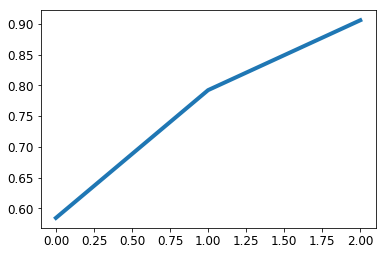

In [21]:
plt.plot(SLOP[::-1])
plt.show()